In [9]:
import sys
import json


sys.path.insert(1, '_common')
import numpy as np
import metrics

In [2]:
def add_result(result_dict: dict, name: str, qubits: [int], depths:[int], rates: [float]):
    metrics = {}
    metrics['avg_create_times'] = [0] * len(qubits)
    metrics['avg_elapsed_times'] = [0] * len(qubits)
    metrics["avg_exec_creating_times"] = []
    metrics["avg_exec_running_times"] = []
    metrics["avg_exec_times"] = [0] * len(qubits)
    metrics["avg_exec_validating_times"] =  []
    metrics["avg_hf_fidelities"] = [0] * len(qubits)
    metrics["avg_depths"] = [100] * len(qubits)
    metrics["avg_tr_n2qs"] = [0] * len(qubits)
    metrics["avg_tr_xis"] = [0] * len(qubits)
    metrics["avg_xis"] = [0] * len(qubits)

    metrics["groups"] = [str(qubit) for qubit in qubits]
    metrics['avg_tr_depths'] = depths
    metrics['avg_fidelities'] = rates

    result = {}
    result['group_metrics'] = metrics

    # Add stubs
    result['backend_id'] = 'simulator'
    result['circuit_metrics'] = None
    result['start_time'] = 0
    result['end_time'] = 0

    result_dict[f'Benchmark Results - {name} - Qiskit'] = result

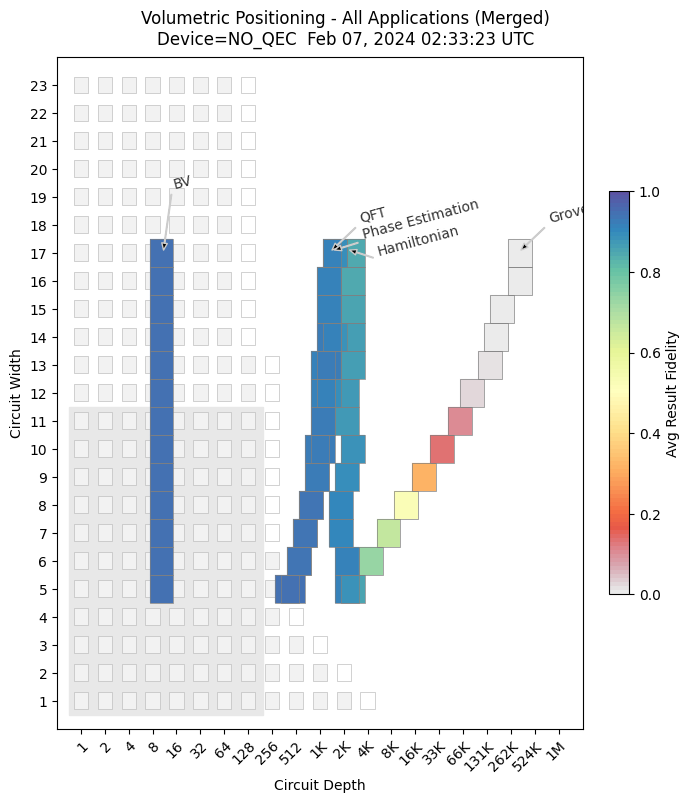

In [22]:
# No QEC

d = {}

add_result(d, 'Grover', list(range(5, 18)),
[2557, 4604, 7653, 13375, 20805, 34260, 62687, 79006, 144486, 175678, 191633, 357374, 351553], [0.9032408089387961, 0.7728923178817023, 0.7046003608062278, 0.5549831709445476, 0.3326800479457437, 0.1421643168029439, 0.11458206179405579, 0.02719029163514909, 0.010702274978671631, 0.0006067292148462878, 0.00013527847499324468, 3.5171250966010712e-06, 1.135743739254177e-07])

add_result(d, 'BV', list(range(5,18)), [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [0.9990603961820277, 0.9984571183495594, 0.9984392153043828, 0.997834318102131, 0.9972298771770299, 0.9972040209309097, 0.9965979698183945, 0.9959923767267302, 0.9959585873486727, 0.995351393288339, 0.9947446589893344, 0.994702956792381, 0.9940946307793953])

add_result(d, 'QFT', list(range(5,18)), [422, 559, 706, 803, 890, 987, 1044, 1071, 1148, 1475, 1427, 1439, 1460],[0.9907224982057826, 0.98538976920823, 0.9839965928465579, 0.977669616222409, 0.9757264960432994, 0.9739818258300442, 0.9712488817040975, 0.965753093601593, 0.9661365461301978, 0.9630336827471705, 0.9617263168423231, 0.9649042060079629, 0.9640225376337432])

add_result(d, 'Hamiltonian', list(range(5,18)), [2202, 2053, 1991, 1984, 2207, 2490, 2398, 2409, 2467, 2590, 2543, 2439, 2437], [0.9664329930384596, 0.9613469771294367, 0.9554132372385788, 0.9509497036719872, 0.9414235052334222, 0.9333822236702456, 0.9259621769171084, 0.9205359556447106, 0.9129429419166787, 0.9059692282899872, 0.9009147415399362, 0.8935034125497956, 0.8856062420046823])

add_result(d, 'Phase Estimation', list(range(5,18)), [469, 548, 667, 826, 945, 1094, 1143, 1262, 1341, 1390, 1439, 1378, 1567], [0.9924638200167576, 0.9900649620114641, 0.9872604599700571, 0.9840627977722493, 0.9812769786437943, 0.9745985076148975, 0.9736673452696353, 0.9709130554723264, 0.9732544172433147, 0.9717112901227962, 0.9713830484406192, 0.9661022781536114, 0.9620415170069172])

with open(f'__data/DATA-NO_QEC.json', 'w') as f:
    json.dump(d, f)

metrics.plot_all_app_metrics('NO_QEC')

... data out of chart range, skipped; w=17.0 d=1166575


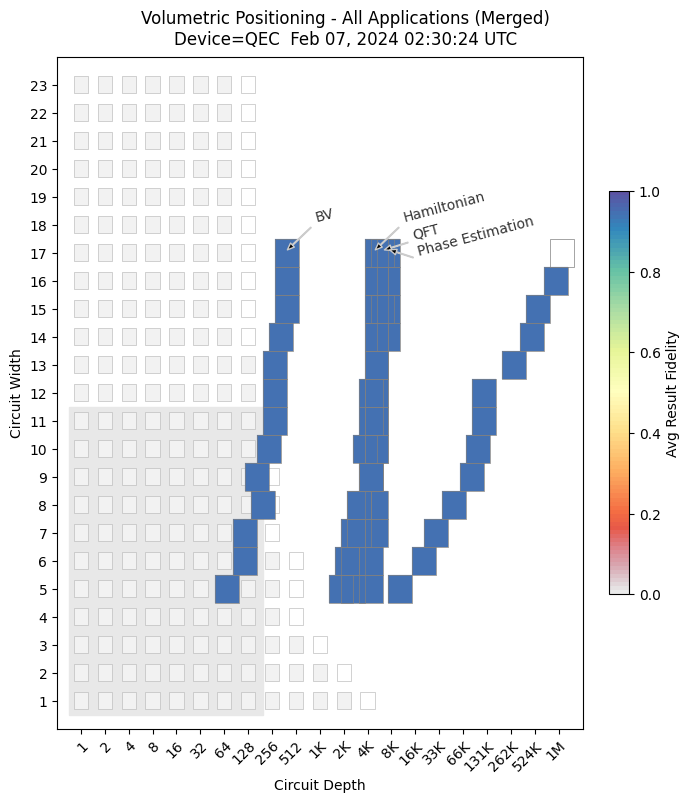

In [20]:
# (19,5) code

d = {}

add_result(d, 'Grover', list(range(5, 23)), [11175, 21400, 31875, 46975, 79975, 106300, 115950, 126375, 300750, 452100, 543750, 907125, 1166575, 1623150, 2254275, 3122975, 4009350, 5761000], [0.9999835113210714, 0.9999621023000922, 0.9999331643205955, 0.9998849306074722, 0.9997851569660193, 0.9996543811801072, 0.999596972229409, 0.9995354063078149, 0.9987759537922468, 0.9979370853841429, 0.9973263890464981, 0.9952428362354766, 0.9934286769338653, 0.9906552481414895, 0.9864441860642771, 0.9797584243170683, 0.9725931688099088, 0.9598761048842148])

add_result(d, 'BV', list(range(5, 18)), [75, 125, 125, 200, 175, 225, 300, 275, 300, 350, 375, 375, 400],
           [0.9999999354544737, 0.999999883527012, 0.9999998833758534, 0.9999998258499123, 0.9999998269382036, 0.9999997706962063, 0.9999997712182199, 0.9999997129964008, 0.9999997148749894, 0.9999996534414656, 0.9999996014771582, 0.9999995980352956, 0.9999996024852332])

add_result(d, 'QFT', list(range(5, 18)), [1850, 2850, 2725, 3275, 4750, 4000, 4275, 4625, 5650, 7025, 6825, 5775, 6675],
           [0.9999955747821568, 0.999991636593306, 0.9999896884792296, 0.9999833355675299, 0.9999890400644175, 0.999984830734934, 0.9999766394388775, 0.9999841337133651, 0.9999834863265968, 0.9999747340700295, 0.9999774274995658, 0.9999699274840178, 0.999972746501242])

add_result(d, 'Hamiltonian', list(range(5, 18)),
           [4675, 4800, 4875, 5125, 4825, 4950, 5125, 5075, 5275, 5400, 5375, 5300, 5125],
           [0.9999544733038628, 0.9999402236794731, 0.999913628382886, 0.9999239377255351, 0.9998840747899009, 0.9999172501477123, 0.9998477408482098, 0.9998677783678226, 0.9998196404265323, 0.9998468325442809, 0.9998024603523153, 0.999821713434651, 0.999766648448019])

add_result(d, 'Phase Estimation', list(range(5, 18)),
           [2475, 2425, 3150, 3300, 4575, 4875, 5650, 5450, 5575, 5750, 7075, 6950, 7775],
           [0.9999936578758764, 0.999992887171294, 0.9999936277547834, 0.9999836418499792, 0.9999888066958121, 0.9999860219080455, 0.9999780781356985, 0.9999870921724621, 0.9999816481420859, 0.999970163136612, 0.9999701530771858, 0.99997390942213, 0.9999732462405462])

with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics.plot_all_app_metrics('QEC')